In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

# comment บรรทัดนี้ออกนะคะ จะได้เป็น interactive
pio.renderers.default = "png"

1.นาย A,B,C,D,E มีรายได้ 10,000 20,000 30,000 40,000 60,000 ต่อเดือนในปี 2020 ตามลำดับ ทุกๆปีเงินเดือนจะเพิ่ม 7% จงสร้าง DataFrame เก็บเงินเดือนของทั้ง 5 นาย ในปี 2016,2017,2018,2019,2020 

In [2]:
# create name list
names = ['A', 'B', 'C', 'D', 'E']

# create year list
years = np.arange(2016,2021)

# calculate and create salary array
salary = []
salary.append([10000, 20000, 30000, 40000, 60000])
for i in range(4) :
    old_salary = [round(x / 1.07,2) for x in salary[i]]
    salary.append(old_salary)
salary.reverse()

# create the data frame
df = pd.DataFrame(np.array(salary).T, names, years)
df

,2016,2017,2018,2019,2020
A,7628.94,8162.97,8734.38,9345.79,10000.0
B,15257.91,16325.96,17468.78,18691.59,20000.0
C,22886.85,24488.93,26203.16,28037.38,30000.0
D,30515.81,32651.92,34937.55,37383.18,40000.0
E,45773.72,48977.88,52406.33,56074.77,60000.0


2.ใช้ข้อมูลจากข้อ 1 สร้าง Bar Plot ให้แกน X เป็นชื่อ และแกน Y เป็นเงินของปี 2017 คูณ 2 และสลับแกน (สองกราฟ) และปรับให้แกน X เอียง -45 องศา

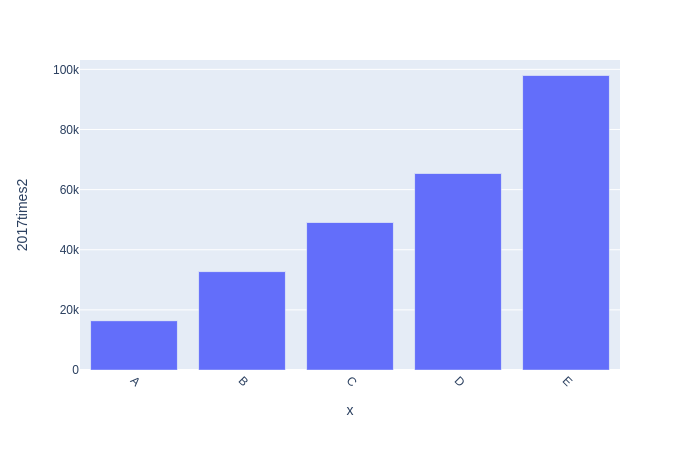

In [3]:
df['2017times2'] = df[2017] * 2
fig = px.bar(df, x = df.index, y = '2017times2')
fig.update_layout(xaxis_tickangle = 45)
fig.show()

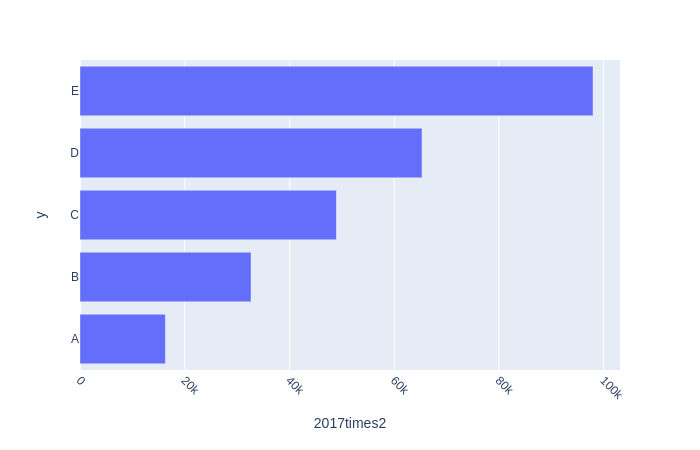

In [4]:
fig = px.bar(df, x = '2017times2', y = df.index, orientation = 'h')
fig.update_layout(xaxis_tickangle = 45)
fig.show()

3.จากข้อ 2 ให้ตั้งชื่อกราฟให้เหมาะสม เป็นชื่อแกน X Y ให้เหมาะสมและให้ไล่สีจากเงินเดือนปี 2016 รวมถึงเมื่อนำเม้าส์ไปวาง จะแสดงเงินเดือนเงินเดือนของแต่ละปี และเงินเดือนเฉลี่ย (จะเพิ่ม column ใน DataFrame หรือจะคำนวณแยกก็ได้) 

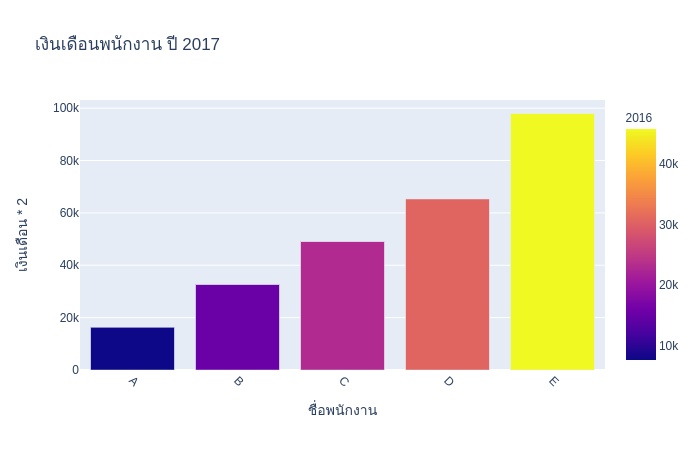

In [5]:
df['average'] = df[[2016,2017,2018,2019,2020]].mean(axis=1)
fig = px.bar(df, x = df.index, y = '2017times2',
            title = 'เงินเดือนพนักงาน ปี 2017',
            labels = {'x':'ชื่อพนักงาน', '2017times2':'เงินเดือน * 2'},
            color = 2016,
            hover_data = [2016, 2017, 2018, 2019, 2020, 'average'])
fig.update_layout(xaxis_tickangle = 45)
fig.show()

ให้ Import ไฟล์ Titanic จากบทเรียน Pandas เข้าสู่ Jupyter Notebook

4.สร้าง Line Graph โดยให้แกน Y เป็นราคาเฉลี่ยของค่าโดยสารของแต่ละอายุ และแกน X เป็นอายุ พร้อมทั้งแก้ชื่อแกน ตั้งชื่อกราฟให้เหมาะสม

In [6]:
df = pd.read_csv('titanic/train.csv')
df.dropna(subset = ['Embarked','Age'], inplace = True)

# สร้าง bins สำหรับกลุ่มช่วงอายุ
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20),
                                     (20, 30), (30, 40), 
                                     (40, 50), (50, 60), 
                                     (60, 70), (70, 80)])
df['AgeInterval'] = pd.cut(df['Age'],bins).astype(str)

type(df['AgeInterval'])
# group by age interval
df1 = df.groupby('AgeInterval').mean()
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
AgeInterval,,,,,,,
"(0, 10]",430.843750,0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
"(10, 20]",447.660870,0.382609,2.530435,17.317391,0.591304,0.391304,29.529531
"(20, 30]",428.682609,0.365217,2.386957,25.423913,0.321739,0.239130,28.306719
"(30, 40]",471.331169,0.441558,2.097403,35.032468,0.376623,0.396104,42.252568
"(40, 50]",483.500000,0.383721,1.918605,45.372093,0.372093,0.430233,41.163181
"(50, 60]",449.809524,0.404762,1.523810,54.892857,0.309524,0.309524,44.774802
"(60, 70]",405.937500,0.187500,1.562500,64.000000,0.187500,0.375000,43.780206
"(70, 80]",438.200000,0.200000,1.800000,73.300000,0.000000,0.000000,25.936680


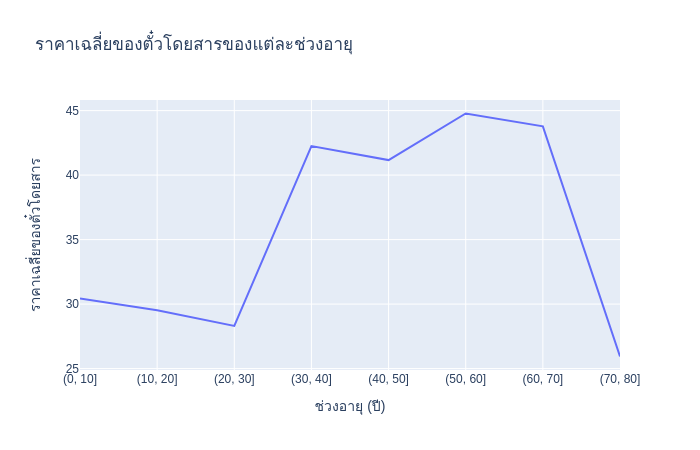

In [7]:
fig = px.line(df1, x = df1.index, y = 'Fare',
              title = 'ราคาเฉลี่ยของตั๋วโดยสารของแต่ละช่วงอายุ',
             labels = {'x':'ช่วงอายุ (ปี)', 'Fare':'ราคาเฉลี่ยของตั๋วโดยสาร'})
fig.show()

5.สร้าง Line Graph โดยให้แกน Y เป็นราคาเฉลี่ยของค่าโดยสารของแต่ละชั้นโดยสาร และแกน X เป็นชั้นโดยสาร พร้อมทั้งแก้ชื่อแกน ตั้งชื่อกราฟให้เหมาะสม

In [8]:
df2 = df.groupby('Pclass').mean()
df2

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,464.157609,0.652174,38.105543,0.456522,0.413043,88.048121
2,447.156069,0.479769,29.877630,0.427746,0.404624,21.471556
3,441.219718,0.239437,25.140620,0.585915,0.456338,13.229435


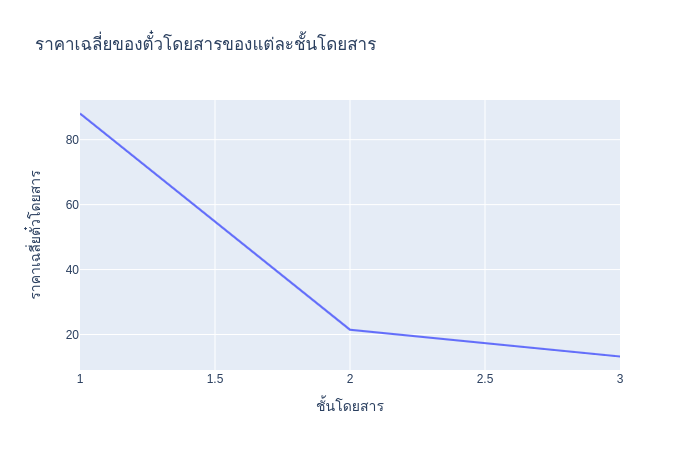

In [9]:
fig = px.line(df2, x = df2.index, y = 'Fare',
             title = 'ราคาเฉลี่ยของตั๋วโดยสารของแต่ละชั้นโดยสาร',
             labels = {'x':'ชั้นโดยสาร', 'Fare':'ราคาเฉลี่ยตั๋วโดยสาร'})
fig.show()

6.สร้าง Pie Chart หา Sum ของราคาค่าโดยสารแต่ละอายุ

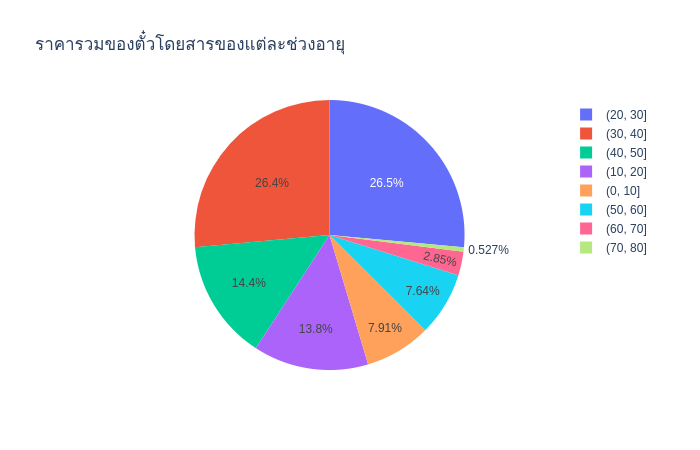

In [10]:
fig = px.pie(df, values = 'Fare', names = 'AgeInterval',
             title = 'ราคารวมของตั๋วโดยสารของแต่ละช่วงอายุ')
fig.show()

7.สร้าง Pie Chart หา Mean ของราคาค่าโดยสารแต่ละอายุ

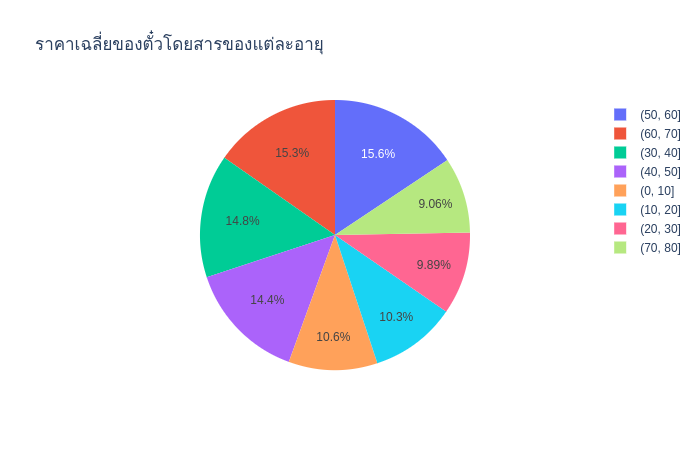

In [11]:
fig = px.pie(df1, values = 'Fare', names = df1.index,
             title = 'ราคาเฉลี่ยของตั๋วโดยสารของแต่ละอายุ')
fig.show()

8.สร้าง Pie Chart หา Mean ของราคาของคนที่มีมีนามสกุลซ้ำกัน (จากแบบฝึกหัด Pandas)

In [12]:
# สร้าง series lastName จากคอลัมน์ Name
lastName = df['Name'].str.extract(r'([\s\w\'\-]+)')

# sort และ หานามสกุลที่ซ้ำ จาก series lastName
lastName.sort_values(0, inplace=True)
duplicatedLN = lastName[lastName.duplicated()][0].unique()

# สร้างคอลัมน์ df['lastName']
df['lastName'] = df['Name'].str.extract(r'([\s\w\'\-]+)')

# สร้าง dataframe เฉพาะของคนที่มีนามสกุลซ้ำกัน
df3 = df[df['lastName'].isin(duplicatedLN)]
df4 = df3.groupby('lastName').mean()
df4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
lastName,,,,,,,
Abbott,513.500000,0.500000,3.0,25.500000,1.0,1.0,20.25000
Abelson,592.000000,0.500000,2.0,29.000000,1.0,0.0,24.00000
Ali,498.000000,0.000000,3.0,24.500000,0.0,0.0,7.05000
Allen,368.000000,0.500000,2.0,32.000000,0.0,0.0,109.69375
Allison,367.666667,0.333333,1.0,9.306667,1.0,2.0,151.55000


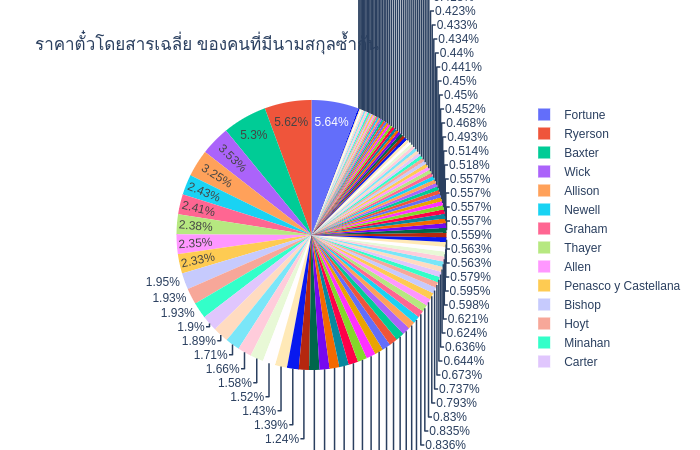

In [13]:
# สร้าง pie chart
fig = px.pie(df4, values = 'Fare', names = df4.index,
            title = 'ราคาตั๋วโดยสารเฉลี่ย ของคนที่มีนามสกุลซ้ำกัน')
fig.show()

9.สร้าง Pie Chart หา Mean ของอายุของคนที่มีมีนามสกุลซ้ำกัน (จากแบบฝึกหัด Pandas) พร้อมทั้งตั้งชื่อและเปลี่ยนสี

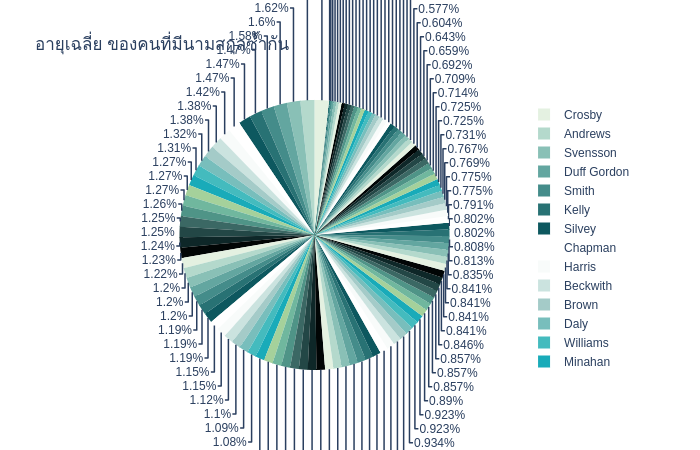

In [14]:
fig = px.pie(df4, values = 'Age', names = df4.index,
            title = 'อายุเฉลี่ย ของคนที่มีนามสกุลซ้ำกัน',
            color_discrete_sequence = px.colors.sequential.Mint)
fig.show()

10.สร้าง Pie Chart หา Mean ของแต่ละจุดหมายปลายทาง (Embarked) พร้อมทั้งตั้งชื่อและเปลี่ยนสี

In [15]:
df5 = df.groupby('Embarked').mean()
df5

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,453.323077,0.607692,1.746154,30.814769,0.423077,0.415385,68.296767
Q,414.035714,0.285714,2.785714,28.089286,0.750000,0.392857,18.265775
S,449.225632,0.362816,2.328520,29.445397,0.523466,0.438628,27.476284


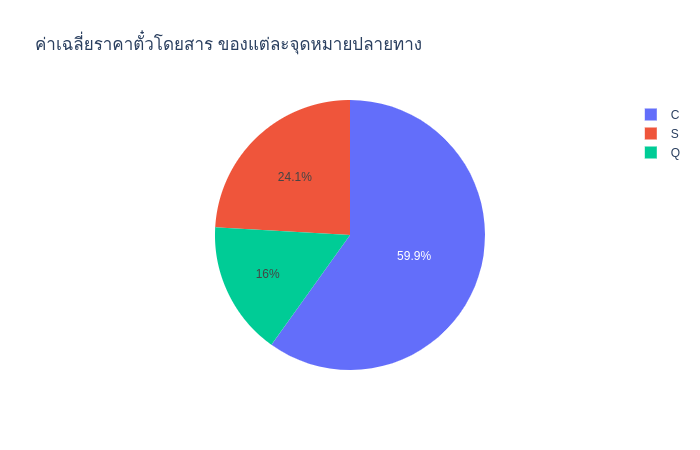

In [16]:
fig = px.pie(df5, values = 'Fare', names = df5.index,
            title = 'ค่าเฉลี่ยราคาตั๋วโดยสาร ของแต่ละจุดหมายปลายทาง')
fig.show()

11.สร้าง Bubble Chart ให้แกน X เป็นช่วงอายุ แกน Y เป็นราคาเฉลี่ย ขนาดตามจำนวนเฉลี่ยของพี่น้องและคู่สมรส (เช็คคอลัมน์) ในช่วงอายุนั้น พร้อมทั้งตั้งชื่อแกน X Y และชื่อกราฟ และไล่สีตามค่าเฉลี่ยของ Pclass

In [17]:
df.head(2)
df6 = df.groupby('AgeInterval').mean()
df6.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
AgeInterval,,,,,,,
"(0, 10]",430.843750,0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
"(10, 20]",447.660870,0.382609,2.530435,17.317391,0.591304,0.391304,29.529531
"(20, 30]",428.682609,0.365217,2.386957,25.423913,0.321739,0.239130,28.306719


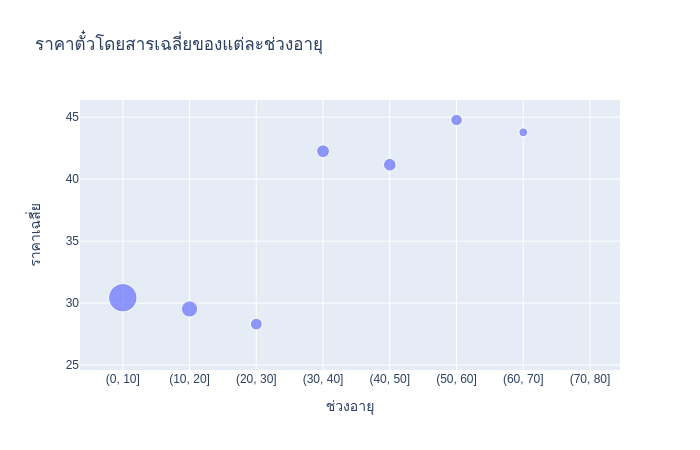

In [18]:
fig = px.scatter(df6, x = df6.index, y = 'Fare',
                size = 'SibSp',
                title = 'ราคาตั๋วโดยสารเฉลี่ยของแต่ละช่วงอายุ',
                labels = {'x':'ช่วงอายุ', 'Fare':'ราคาเฉลี่ย'})
fig.show()

12.สร้าง Box Plot ให้แกน X เป็นเพศ และ แกน Y เป็นราคา

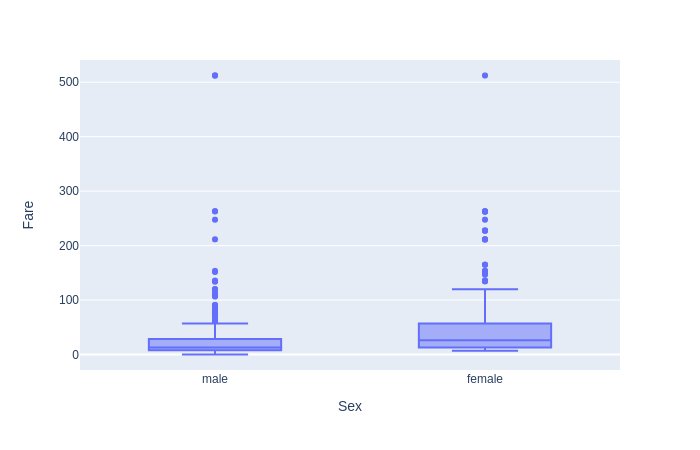

In [19]:
fig = px.box(df, x = 'Sex', y = 'Fare')
fig.show()

13.สร้าง Box Plot ให้แกน X เป็นPclass และ แกน Y เป็นราคา

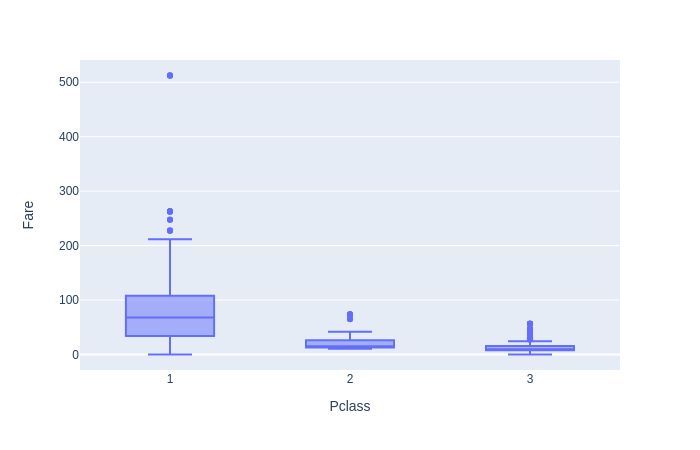

In [20]:
fig = px.box(df, x = 'Pclass', y = 'Fare')
fig.show()

14.สร้าง Box Plot ให้แกน X เป็นPclass และ แกน Y เป็นอายุ ให้ Points = all

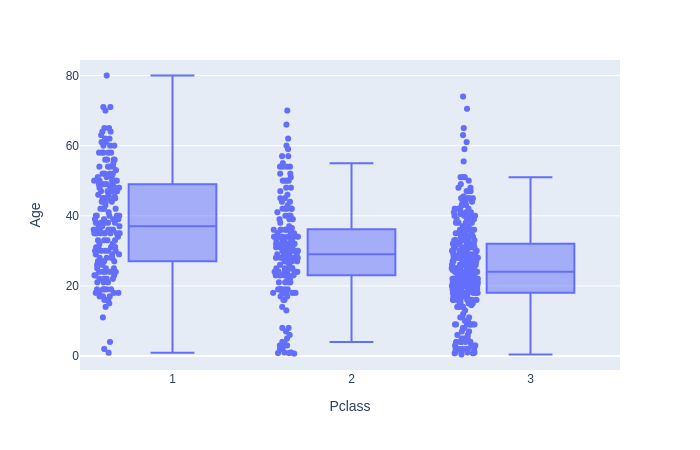

In [21]:
fig = px.box(df, x = 'Pclass', y = 'Age', points = 'all')
fig.show()

15.สร้าง Box Plot ให้แกน X เป็น Survived แกน Y เป็นอายุ และสีเป็นเพศ

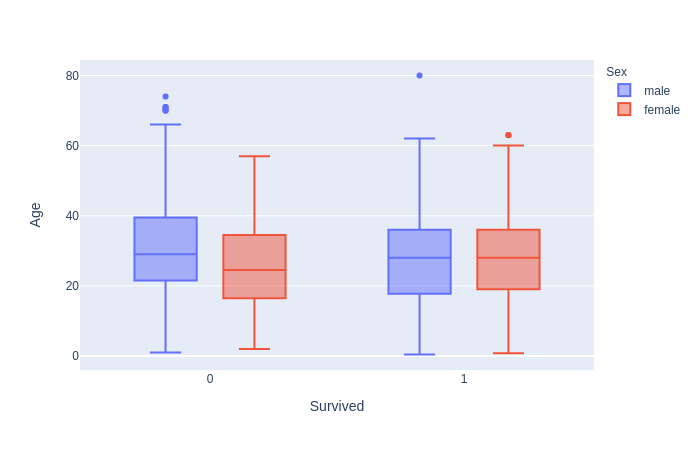

In [22]:
fig = px.box(df, x = 'Survived', y = 'Age', color = 'Sex')
fig.show()

16.สร้าง barplot โดยให้ แกน X เป็นจุดหมายปลายทางและแกน Y เป็น std ของราคา

In [23]:
df7 = df.groupby('Embarked').std()
df7

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,254.534724,0.490153,0.909140,15.434860,0.568766,0.690855,90.557822
Q,273.392064,0.460044,0.568112,16.915396,1.430488,0.994030,21.843582
S,259.243945,0.481247,0.782042,14.143192,0.966149,0.882227,36.546362


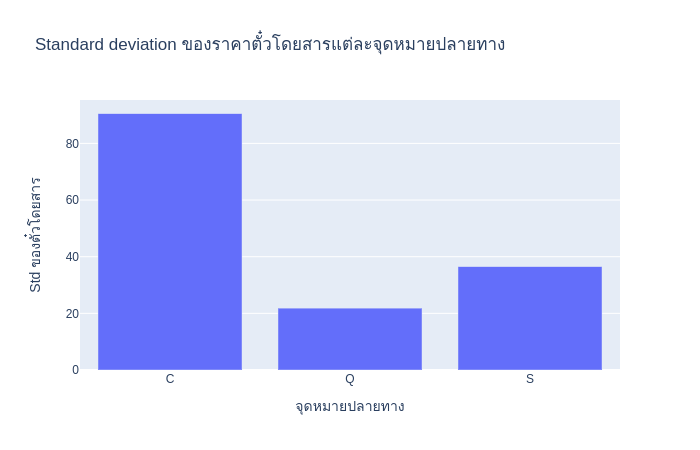

In [24]:
fig = px.bar(df7, x = df7.index, y = 'Fare',
            title = 'Standard deviation ของราคาตั๋วโดยสารแต่ละจุดหมายปลายทาง',
            labels = {'x':'จุดหมายปลายทาง','Fare':'Std ของตั๋วโดยสาร'})
fig.show()

17.สร้าง barplot โดยให้ แกน X เป็นชั้นที่นั่ง และแกน Y เป็น Mean ของอายุ

In [25]:
df2

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,464.157609,0.652174,38.105543,0.456522,0.413043,88.048121
2,447.156069,0.479769,29.877630,0.427746,0.404624,21.471556
3,441.219718,0.239437,25.140620,0.585915,0.456338,13.229435


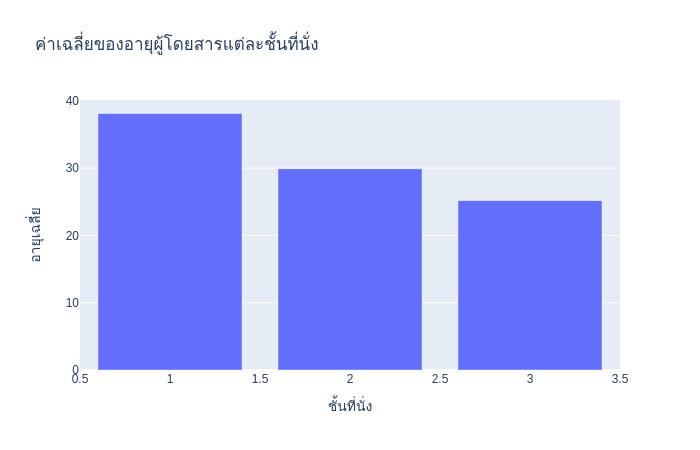

In [26]:
fig = px.bar(df2, x = df2.index, y = 'Age',
            title = 'ค่าเฉลี่ยของอายุผู้โดยสารแต่ละชั้นที่นั่ง',
            labels = {'x':'ชั้นที่นั่ง', 'Age':'อายุเฉลี่ย'})
fig.show()

18.สร้าง HeatMap โดย pivot table กำหนดให้ index เป็น Pclass และ column เป็นเพศ และ values เป็น ราคาเฉลี่ย

In [27]:
df8 = df.pivot_table(index = 'Pclass', columns = 'Sex', values = 'Fare', aggfunc = np.mean)
df8

Sex,female,male
Pclass,,
1,108.619680,71.142781
2,21.951070,21.113131
3,15.875369,12.162695


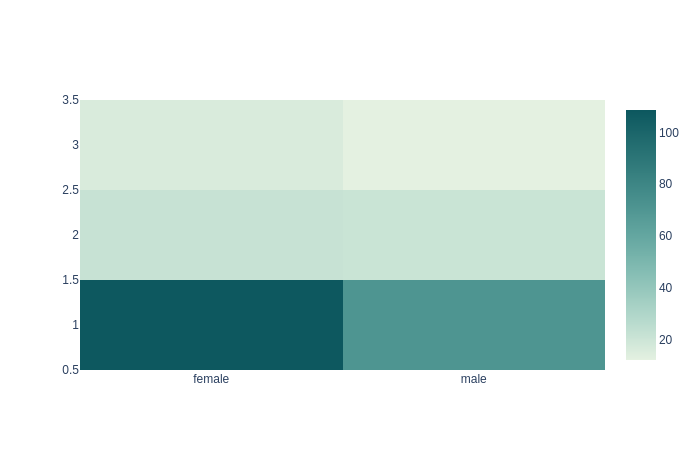

In [28]:
import plotly.graph_objects as go
fig = go.Figure(data = go.Heatmap(
        z = df8, x = df8.columns, y = df8.index,
        colorscale = 'Mint'))
fig.show()

19.สร้าง Heatmap โดย Correlation ของทั้ง DataFrame และเปลี่ยนสี

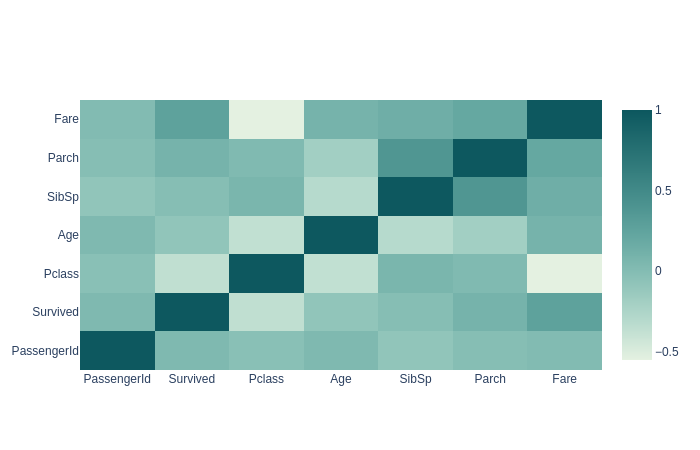

In [29]:
df9 = df.corr()
fig = go.Figure(data = go.Heatmap(
        z = df9, x = df9.index, y = df9.index,
        colorscale = 'Mint'))
fig.show()

20.ใช้ไฟล์ 2011_us_ag_exports.csv สร้าง Choropleth ของอเมริกาโดยไล่สีตาม Cotton และเมื่อนำเม้าส์ไปวาง จะเห็นรายละเอียด total exports, total fruits, total veggies

In [30]:
df11 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv', dtype = str)

df11['text'] = df11['state'] + '<br>' + \
            'total exports ' + df11['total exports'] + '<br>' + \
            'total fruits ' + df11['total fruits'] + '<br>' + \
            'total veggies ' + df11['total veggies']
df11.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.40,10.60,481.00,4.06,8.00,17.10,25.11,5.50,8.90,14.33,34.90,70.00,317.61,Alabama<br>total exports 1390.63<br>total frui...
1,AK,Alaska,state,13.31,0.20,0.10,0.00,0.19,0.00,0.00,0.00,0.60,1.00,1.56,0.00,0.00,0.00,Alaska<br>total exports 13.31<br>total fruits ...
2,AZ,Arizona,state,1463.17,71.30,17.90,0.00,105.48,19.30,41.00,60.27,147.50,239.40,386.91,7.30,48.70,423.95,Arizona<br>total exports 1463.17<br>total frui...
3,AR,Arkansas,state,3586.02,53.20,29.40,562.90,3.53,2.20,4.70,6.88,4.40,7.10,11.45,69.50,114.50,665.44,Arkansas<br>total exports 3586.02<br>total fru...
4,CA,California,state,16472.88,228.70,11.10,225.40,929.95,2791.80,5944.60,8736.40,803.20,1303.50,2106.79,34.60,249.30,1064.95,California<br>total exports 16472.88<br>total ...


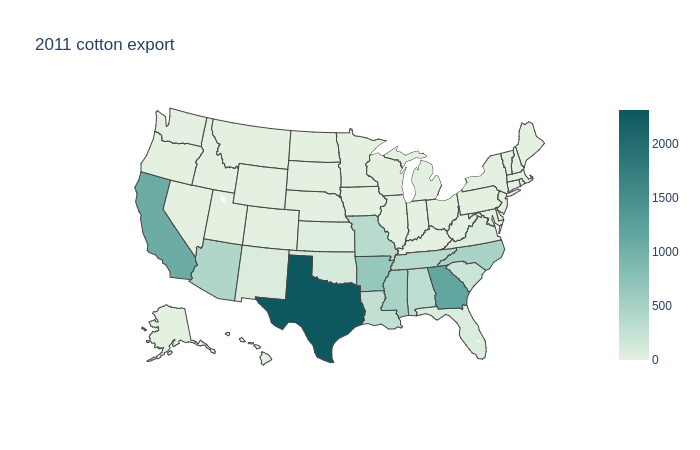

In [31]:
fig = go.Figure(data = go.Choropleth(
        locations = df11['code'],
        z = df11['cotton'].astype(float),
        locationmode = 'USA-states',
        colorscale = 'Mint',
        text = df11['text']))

fig.update_layout(geo_scope = 'usa',
                 title_text = '2011 cotton export')
fig.show()

21.ใช้ไฟล์ 2011_us_ag_exports.csv สร้าง Choropleth ของอเมริกาโดยไล่สีตาม Total veggies และเมื่อนำเม้าส์ไปวาง จะเห็นรายละเอียด อัตราส่วน beef ต่อ pork เป็นเลขทศนิยม 2 ตำแหน่ง

In [32]:
df11['beef:pork'] = round(df11['beef'].astype(float)/df11['pork'].astype(float),2).astype(str)

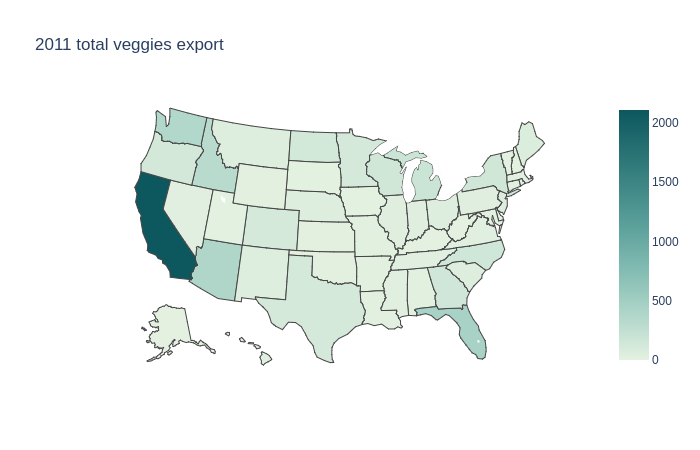

In [33]:
fig = go.Figure(data = go.Choropleth(
        locations = df11['code'],
        z = df11['total veggies'].astype(float),
        locationmode = 'USA-states',
        colorscale = 'Mint',
        text = 'beef:pork '+ df11['beef:pork']))

fig.update_layout(geo_scope = 'usa',
                 title_text = '2011 total veggies export')
fig.show()

22.สุ่ม 10 States จากไฟล์ข้างต้น นำมาสร้าง Bar plot โดยแกน Y เป็น Total Exports และไล่สีตามอัตราส่วน cotton ต่อ Wheat พร้อมทั้งเปลี่ยนชื่อแกน และตั้งชื่อกราฟ (ถ้าอัตราส่วนหาค่าไม่ได้ให้ใช้ 0)

In [34]:
df11['cotton:wheat'] = round(df11['cotton'].astype(float) / df11['wheat'].astype(float),2)
df11['cotton:wheat'].fillna(value = 0, inplace = True)
df11.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text,beef:pork,cotton:wheat
0,AL,Alabama,state,1390.63,34.40,10.60,481.00,4.06,8.00,17.10,25.11,5.50,8.90,14.33,34.90,70.00,317.61,Alabama<br>total exports 1390.63<br>total frui...,3.25,4.54
1,AK,Alaska,state,13.31,0.20,0.10,0.00,0.19,0.00,0.00,0.00,0.60,1.00,1.56,0.00,0.00,0.00,Alaska<br>total exports 13.31<br>total fruits ...,2.0,0.00
2,AZ,Arizona,state,1463.17,71.30,17.90,0.00,105.48,19.30,41.00,60.27,147.50,239.40,386.91,7.30,48.70,423.95,Arizona<br>total exports 1463.17<br>total frui...,3.98,8.71
3,AR,Arkansas,state,3586.02,53.20,29.40,562.90,3.53,2.20,4.70,6.88,4.40,7.10,11.45,69.50,114.50,665.44,Arkansas<br>total exports 3586.02<br>total fru...,1.81,5.81
4,CA,California,state,16472.88,228.70,11.10,225.40,929.95,2791.80,5944.60,8736.40,803.20,1303.50,2106.79,34.60,249.30,1064.95,California<br>total exports 16472.88<br>total ...,20.6,4.27


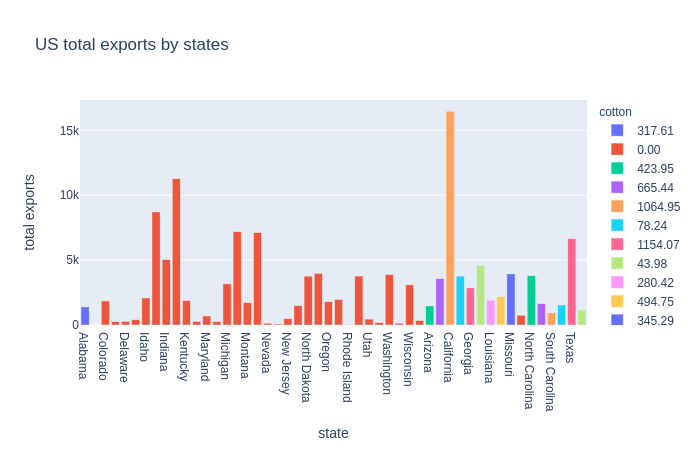

In [35]:
fig = px.bar(df11, x = df11['state'], y = df11['total exports'],
            color = df11['cotton'],
            title = 'US total exports by states')
fig.show()